## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (5,10)
sns.set()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/1 Exploratory Data Analysis/Airbnb Bookings Analysis/Airbnb NYC 2019.csv'
df = pd.read_csv(path)
df_air = df.copy()

Mounted at /content/drive


# Functions

In [5]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Peak

In [6]:
df_air.shape

(48895, 16)

In [7]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df_air.groupby('neighbourhood')['price'].sum().sort_values(ascending=False)

neighbourhood
Williamsburg          563707
Midtown               436801
Upper West Side       415720
Hell's Kitchen        400987
Bedford-Stuyvesant    399917
                       ...  
Westerleigh              143
Silver Lake              140
Richmondtown              78
Rossville                 75
New Dorp                  57
Name: price, Length: 221, dtype: int64

In [10]:
df_air['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [11]:
df_air.groupby('neighbourhood_group')['room_type'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: room_type, dtype: int64

In [12]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# 1 What can we learn about different hosts and areas?

## Host Vs Count and Price

In [13]:
host_counts = df_air['host_id'].value_counts()
host_counts.describe()

count    37457.000000
mean         1.305363
std          2.760747
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: host_id, dtype: float64

In [14]:
host_counts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

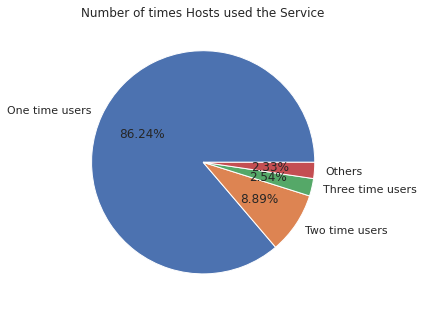

In [15]:
# Percentage of hosts using service one time
one_time = 100*host_counts[host_counts==1].count()/len(host_counts)
two_time = 100*host_counts[host_counts==2].count()/len(host_counts)
three_time = 100*host_counts[host_counts==3].count()/len(host_counts)
four_plus = 100*host_counts[host_counts>3].count()/len(host_counts)

numbers = [one_time, two_time, three_time, four_plus]
labels = ['One time users', 'Two time users', 'Three time users', 'Others']

plt.pie(numbers, labels=labels, autopct='%1.2f%%')
plt.title('Number of times Hosts used the Service')
plt.show()

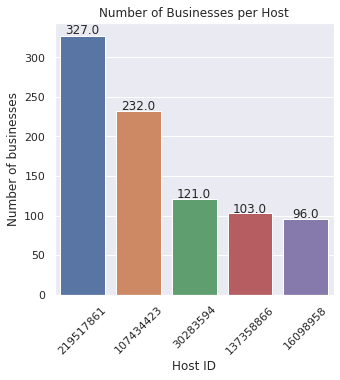

['Sonder (NYC)', 'Blueground', 'Kara', 'Kazuya', 'Jeremy & Laura']


In [16]:
# Which hosts are most valuable
data = host_counts.head(5)
names = [df_air['host_name'][df_air['host_id'] == i].values[0] for i in data.index]
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.barplot(y=data.values, x=data.index, orient='v', order=data.index)
show_values(ax, orient='v')
plt.ylabel('Number of businesses')
plt.xlabel('Host ID')
plt.xticks(rotation=45)
plt.title('Number of Businesses per Host')
plt.show()
print(names)

In [17]:
host_total_price = df.groupby('host_id')['price'].sum().sort_values(ascending=False)
host_total_price.head(10)

host_id
219517861    82795
107434423    70331
156158778    37097
205031545    35294
30283594     33581
12243051     20451
16098958     20060
836168       19500
200380610    18865
3750764      18780
Name: price, dtype: int64

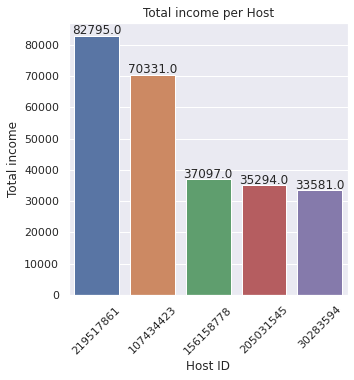

['Sonder (NYC)', 'Blueground', 'Sally', 'Red Awning', 'Kara']


In [18]:
# Which hosts gets most income
data = host_total_price.head(5)
names = [df_air['host_name'][df_air['host_id'] == i].values[0] for i in data.index]
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.barplot(y=data.values, x=data.index, orient='v', order=data.index)
show_values(ax, orient='v')
plt.ylabel('Total income')
plt.xlabel('Host ID')
plt.xticks(rotation=45)
plt.title('Total income per Host')
plt.show()
print(names)

## Neighbourhood vs Count, Room type and Price

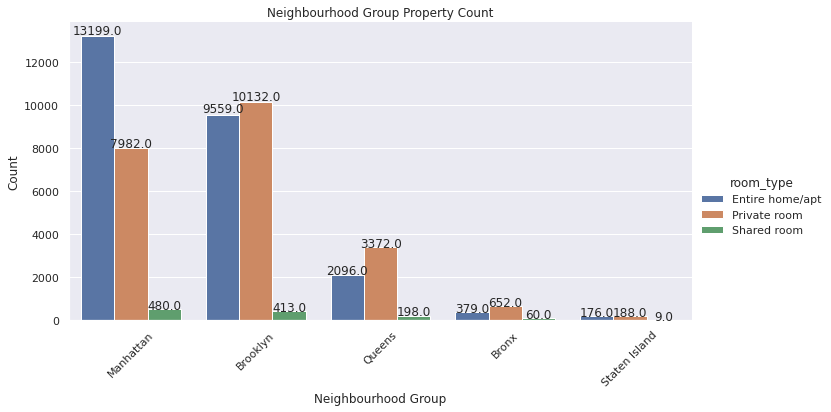

In [59]:
neighrooms = df_air.groupby(['neighbourhood_group', 'room_type'])['id'].count()
df_neighrooms = pd.DataFrame(tuple(neighrooms.index), columns=neighrooms.index.names)
df_neighrooms['count'] = neighrooms.values
# df_neighrooms['count'] = df_neighrooms['count'].astype(int)

ax = sns.catplot(x='neighbourhood_group', y='count', hue='room_type', 
                 data=df_neighrooms, 
                 kind='bar', 
                 orient='v', 
                #  height = 5,
                 aspect = 2,
                 order= df_air.groupby('neighbourhood_group')['id'].count().sort_values(ascending=False).index
                 )
show_values(ax.ax, orient='v')
plt.ylabel('Count')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.title('Neighbourhood Group Property Count')
plt.show()

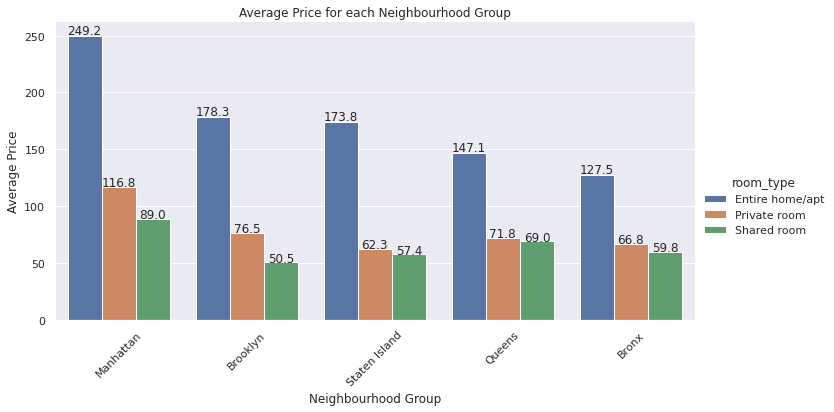

In [60]:
# Which neighbourhood is most costly
neighrooms = df_air.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
df_neighrooms = pd.DataFrame(tuple(neighrooms.index), columns=neighrooms.index.names)
df_neighrooms['average_price'] = neighrooms.values
# df_neighrooms['count'] = df_neighrooms['count'].astype(int)

ax = sns.catplot(x='neighbourhood_group', y='average_price', hue='room_type', 
                 data=df_neighrooms, 
                 kind='bar', 
                 orient='v', 
                #  height = 5,
                 aspect = 2,
                 order= df_air.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).index
                 )
show_values(ax.ax, orient='v')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.title('Average Price for each Neighbourhood Group')
plt.show()

## Room Type Distribution

In [105]:
plt.rcParams['axes.titleweight']

'normal'

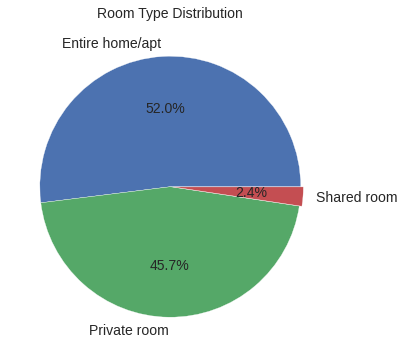

In [108]:
data = df_air['room_type'].value_counts()
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'medium'
# plt.style.use('seaborn')
# plt.titlesize
ax = plt.pie(data, 
        labels=data.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 14},
        explode=[0,0,0.02],
        )
plt.title('Room Type Distribution')
plt.show()

# 2 What can we learn from predictions? (ex: locations, prices, reviews, etc)

## Num of Reviews vs Host count

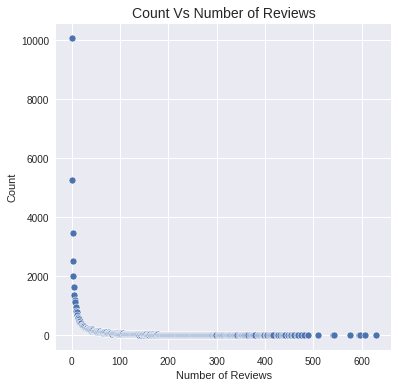

In [129]:
# What number of reviews tells about business
data = df_air.groupby('number_of_reviews')['id'].count()
sns.scatterplot(y=data.values, x=data.index)
plt.title('Count Vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


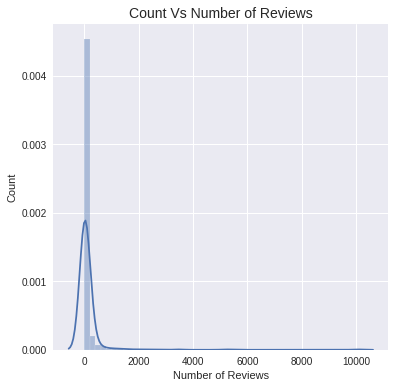

In [130]:
sns.distplot(data)
plt.title('Count Vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

## Reviews per month vs Host count

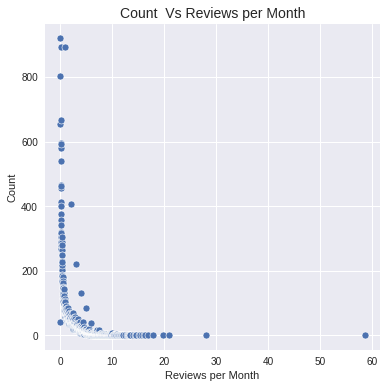

In [131]:
# What reviews per month tells about business
data = df_air.groupby('reviews_per_month')['id'].count()
sns.scatterplot(y=data.values, x=data.index)
plt.title('Count  Vs Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


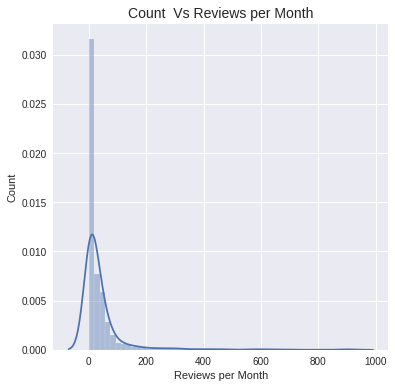

In [132]:
sns.distplot(data)
plt.title('Count  Vs Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.show()

## Neighbourhood vs Host count

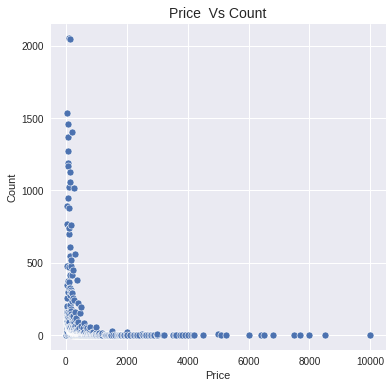

## Prices vs Host count

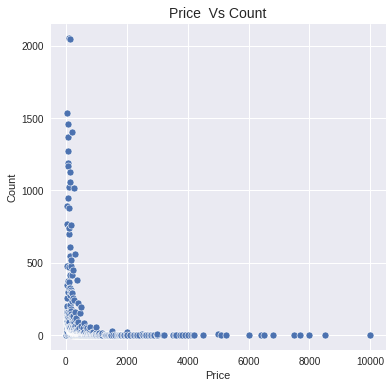

In [133]:
# What reviews per month tells about business
data = df_air.groupby('price')['id'].count()
sns.scatterplot(y=data.values, x=data.index)
plt.title('Price  Vs Count')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


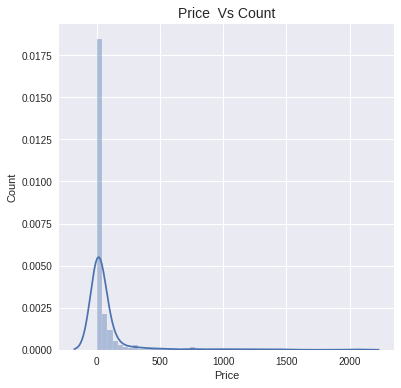

In [134]:
# What reviews price tells about business
sns.distplot(data)
plt.title('Price  Vs Count')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## Minimum nights vs Host count

## Minimum Nights vs Price

# 3 Which hosts are the busiest and why?

# 4 Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# 5 Others

## Availability vs Houst count

## words in Name vs count

## Room type count